In [21]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/credit_card_fraud_10k.csv")
df

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0
...,...,...,...,...,...,...,...,...,...,...
9995,9996,350.91,22,Food,0,0,99,4,37,0
9996,9997,410.04,5,Clothing,0,0,70,3,25,0
9997,9998,527.75,21,Electronics,0,0,44,2,45,0
9998,9999,91.20,2,Electronics,0,0,38,0,37,0


In [28]:
df.set_index("transaction_id",inplace=True)

In [31]:
df.isnull().sum()

,0
amount,0
transaction_hour,0
merchant_category,0
foreign_transaction,0
location_mismatch,0
device_trust_score,0
velocity_last_24h,0
cardholder_age,0
is_fraud,0


In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["merchant_category"]=le.fit_transform(df["merchant_category"])

In [32]:
df

,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
transaction_id,,,,,,,,,
1,84.47,22,1,0,0,66,3,40,0
2,541.82,3,4,1,0,87,1,64,0
3,237.01,17,3,0,0,49,1,61,0
4,164.33,4,3,0,1,72,3,34,0
5,30.53,15,2,0,0,79,0,44,0
...,...,...,...,...,...,...,...,...,...
9996,350.91,22,2,0,0,99,4,37,0
9997,410.04,5,0,0,0,70,3,25,0
9998,527.75,21,1,0,0,44,2,45,0


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

print("Classification models imported successfully!")

Classification models imported successfully!


In [33]:
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (10000, 8)
Shape of y: (10000,)


In [34]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')

selector.fit(X, y)

feature_scores = selector.scores_
feature_names = X.columns

feature_scores_df = pd.DataFrame({
    'Feature': feature_names,
    'Score': feature_scores
})

feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

print("Feature Scores:")
print(feature_scores_df)

Feature Scores:
               Feature       Score
3  foreign_transaction  356.681537
4    location_mismatch  308.495609
1     transaction_hour  196.008846
5   device_trust_score  193.848260
6    velocity_last_24h  108.077941
0               amount    8.073018
2    merchant_category    2.357091
7       cardholder_age    0.003478


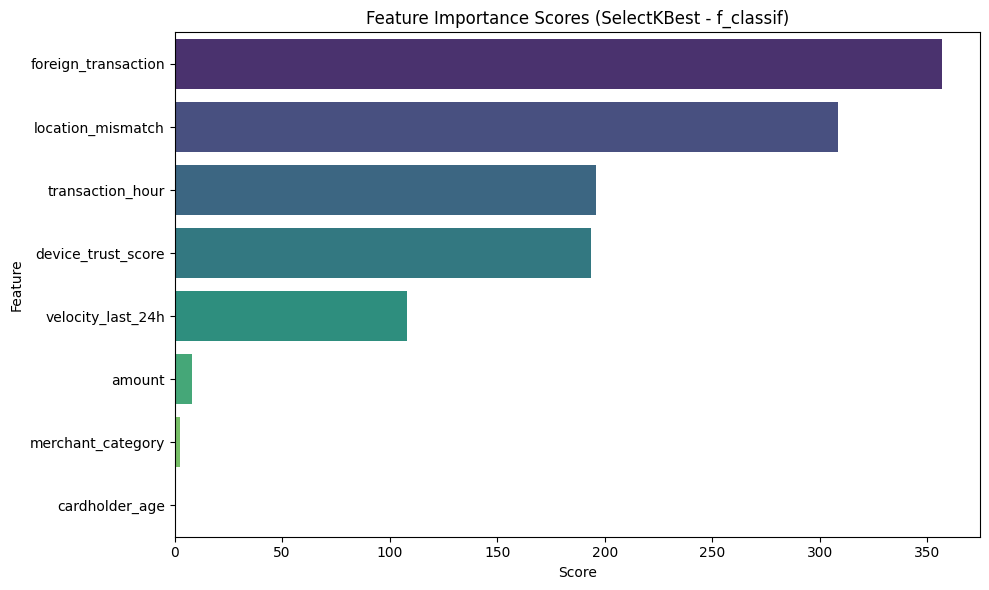

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores_df, palette='viridis', hue=feature_scores_df['Feature'], legend=False)
plt.title('Feature Importance Scores (SelectKBest - f_classif)')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [43]:
X_changed=df[["foreign_transaction","location_mismatch","transaction_hour","device_trust_score","velocity_last_24h"]]
y_changed=df["is_fraud"]

In [64]:
y_changed.value_counts()

,count
is_fraud,
0,9849
1,151


In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_changed=scaler.fit_transform(X_changed)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
X_train,X_test,y_train,y_test=train_test_split(X_changed,y_changed,test_size=0.2,random_state=42,stratify=y_changed)


In [79]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
X_test_res,y_test_res=sm.fit_resample(X_test,y_test)

print('Original training set shape %s' % y_train.value_counts())
print('Resampled training set shape %s' % y_train_res.value_counts())
print("Original test set shape %s" % y_test.value_counts())
print("Resampled test set shape %s" % y_test_res.value_counts())

Original training set shape is_fraud
0    7879
1     121
Name: count, dtype: int64
Resampled training set shape is_fraud
0    7879
1    7879
Name: count, dtype: int64
Original test set shape is_fraud
0    1970
1      30
Name: count, dtype: int64
Resampled test set shape is_fraud
0    1970
1    1970
Name: count, dtype: int64


In [75]:
model1_smote = LogisticRegression(random_state=42)
model1_smote.fit(X_train_res, y_train_res)
y_pred_smote = model1_smote.predict(X_test_res)

print('Confusion Matrix after SMOTE:')
print(confusion_matrix(y_test_res, y_pred_smote))
print('\nClassification Report after SMOTE:')
print(classification_report(y_test_res, y_pred_smote))

Confusion Matrix after SMOTE:
[[1873   97]
 [   0 1970]]

Classification Report after SMOTE:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1970
           1       0.95      1.00      0.98      1970

    accuracy                           0.98      3940
   macro avg       0.98      0.98      0.98      3940
weighted avg       0.98      0.98      0.98      3940



In [78]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
model = LogisticRegression(random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_accuracy = cross_val_score(model, X_train_res, y_train_res, cv=skf, scoring='accuracy')
cv_scores_recall = cross_val_score(model, X_train_res, y_train_res, cv=skf, scoring='recall')
cv_scores_precision = cross_val_score(model, X_train_res, y_train_res, cv=skf, scoring='precision')
cv_scores_f1 = cross_val_score(model, X_train_res, y_train_res,cv=skf, scoring='f1')

print(f"Cross-validation Accuracy Scores: {cv_scores_accuracy}")
print(f"Mean Accuracy: {cv_scores_accuracy.mean():.2f} (+/- {cv_scores_accuracy.std():.2f})")
print(f"\nCross-validation Recall Scores: {cv_scores_recall}")
print(f"Mean Recall: {cv_scores_recall.mean():.2f} (+/- {cv_scores_recall.std():.2f})")
print(f"\nCross-validation Precision Scores: {cv_scores_precision}")
print(f"Mean Precision: {cv_scores_precision.mean():.2f} (+/- {cv_scores_precision.std():.2f})")
print(f"\nCross-validation F1-Score Scores: {cv_scores_f1}")
print(f"Mean F1-Score: {cv_scores_f1.mean():.2f} (+/- {cv_scores_f1.std():.2f})")

Cross-validation Accuracy Scores: [0.95875635 0.95939086 0.95336294 0.94922247 0.95461758]
Mean Accuracy: 0.96 (+/- 0.00)

Cross-validation Recall Scores: [0.96827411 0.96573604 0.95812183 0.95111111 0.95939086]
Mean Recall: 0.96 (+/- 0.01)

Cross-validation Precision Scores: [0.9501868  0.95363409 0.94908862 0.94750158 0.95034569]
Mean Precision: 0.95 (+/- 0.00)

Cross-validation F1-Score Scores: [0.95914519 0.95964691 0.95358383 0.94930292 0.95484686]
Mean F1-Score: 0.96 (+/- 0.00)
